<a href="https://colab.research.google.com/github/elianasv/HNC_PREDICTION/blob/main/GlobalMinMaxScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Set the path of the folder in drive to save the generated datasets
folder_path = '/content/drive/MyDrive/Tesis/DefinitiveDatasets'

In [42]:
# This URL leads to a Github repository containing the anonymized dataset with the random numbers already removed
filename = "https://github.com/elianasv/HNC_PREDICTION/raw/main/df_clean.xlsx"
df_clean = pd.read_excel(filename,engine='openpyxl')

### Global min max scaling

We need a normalization technique that allows us to have features between 0 and 1 but maintaining the same intrasubject variability across subjects.

It's woth mentioning that other techniques such as Robust scaler, Standard scales and Usual Min Max scaler were tested but didn't work because changed the curve's repective behavior across thresholds.




In [43]:
def global_min_max_scaler(df):
    # Calculate the global minimum and maximum from the entire dataset
    global_min = df.min().min()
    global_max = df.max().max()

    # Apply Min-Max normalization using the global min and max
    scaled_df = (df - global_min) / (global_max - global_min)
    return scaled_df


In [44]:
df_glob_minmax = df_clean.copy()

In [45]:
#A list with the way the features are organized is defined
features = ['int_SUVMean_T_', 'int_SUVMean_N_', 'int_SUVVariance_T_', 'int_SUVVariance_N_',
            'int_SUVSkewness_T_', 'int_SUVSkewness_N_', 'int_SUVKurtosis_T_', 'int_SUVKurtosis_N_',
            'int_SUVPeak_T_', 'int_SUVPeak_N_', 'int_MTV_T_', 'int_MTV_N_', 'int_TLG_T_',
            'int_TLG_N_']
comps= ['abs', 'rel']

In [46]:
for feature in features:
  for comp in comps:
    col_subset = df_glob_minmax.loc[:, df_glob_minmax.columns.str.contains(feature) & df_glob_minmax.columns.str.contains(comp)]
    scaled_subset = global_min_max_scaler(col_subset)
    df_glob_minmax[col_subset.columns] = scaled_subset


In [47]:
df_glob_minmax

,Age,Centre,DFS,DFSCensor,Dcd,ID,LRC,LRCCensor,LocalisationORL,OS,...,int_TLG_N_92rel,int_TLG_N_93rel,int_TLG_N_94rel,int_TLG_N_95rel,int_TLG_N_96rel,int_TLG_N_97rel,int_TLG_N_98rel,int_TLG_N_99rel,int_TLG_N_100rel,stade
0,59,1,16,0,0,6,16,0,2,16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
1,51,1,4,1,1,7,4,1,2,16,...,0.001604,0.000816,0.000816,0.000816,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,54,1,4,1,0,8,39,0,2,39,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,64,1,39,0,0,9,39,0,2,39,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
4,48,1,35,0,0,10,35,0,2,35,...,0.013684,0.013684,0.013176,0.012663,0.012663,0.012139,0.012139,0.010530,0.009991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,72,2,6,0,0,178,6,0,3,6,...,0.000155,0.000155,0.000155,0.000155,0.000155,0.000155,0.000155,0.000078,0.000078,3
230,53,2,11,0,0,181,11,0,2,11,...,0.001209,0.000752,0.000752,0.000550,0.000550,0.000550,0.000279,0.000279,0.000279,4
231,54,2,3,0,0,190,3,0,2,3,...,0.000845,0.000845,0.000713,0.000450,0.000318,0.000318,0.000279,0.000140,0.000140,4
232,62,2,5,0,0,191,5,0,2,5,...,0.001883,0.001697,0.001333,0.000961,0.000775,0.000775,0.000388,0.000194,0.000000,3


In [48]:
# Function to create a plot matrix for a specific stade
def create_plot_matrix(df, stade, axs, color):
    # Loop through each feature and component
    for i, feature in enumerate(features):
        # Each row corresponds to a feature, and each row has 4 plots (2 for abs, 2 for rel)
        row = i  # One row per feature

        for j, comp in enumerate(comps):
            # Prepare the subplot
            col = j * 2  # First two columns for T_, last two columns for N_
            ax_T = axs[row, col]
            ax_N = axs[row, col+1]

            # Set titles and labels
            ax_T.set_xlabel('Threshold')
            ax_N.set_xlabel('Threshold')

            ax_T.set_ylabel(feature)
            ax_T.set_title(f'{feature} (T_) ({comp})')
            ax_N.set_title(f'{feature} (N_) ({comp})')

            ax_T.grid(True)
            ax_N.grid(True)

            # Filter the subjects for the current stade
            subjects = df[df['stade'] == stade]

            # Plot each subject in the current stade (same color for all subjects in this stade)
            for index, subject in subjects.iterrows():
                # Extract the relevant data for T_ and N_
                SUVMean_T = subject[df.columns.str.contains(f'{feature}_T_') & df.columns.str.contains(f'{comp}')]
                SUVMean_N = subject[df.columns.str.contains(f'{feature}_N_') & df.columns.str.contains(f'{comp}')]

                # Extract thresholds from the index
                thresholds_T = [
                    float(key.split('_')[-1].replace('rel', '').replace('abs', '').replace(',', '.'))
                    for key in SUVMean_T.index
                ]
                thresholds_N = [
                    float(key.split('_')[-1].replace('rel', '').replace('abs', '').replace(',', '.'))
                    for key in SUVMean_N.index
                ]

                # Extract values
                values_T = SUVMean_T.values
                values_N = SUVMean_N.values

                # Plotting in the correct subplot with the same color for the current stade
                ax_T.plot(thresholds_T, values_T, color=color)
                ax_N.plot(thresholds_N, values_N, color=color)


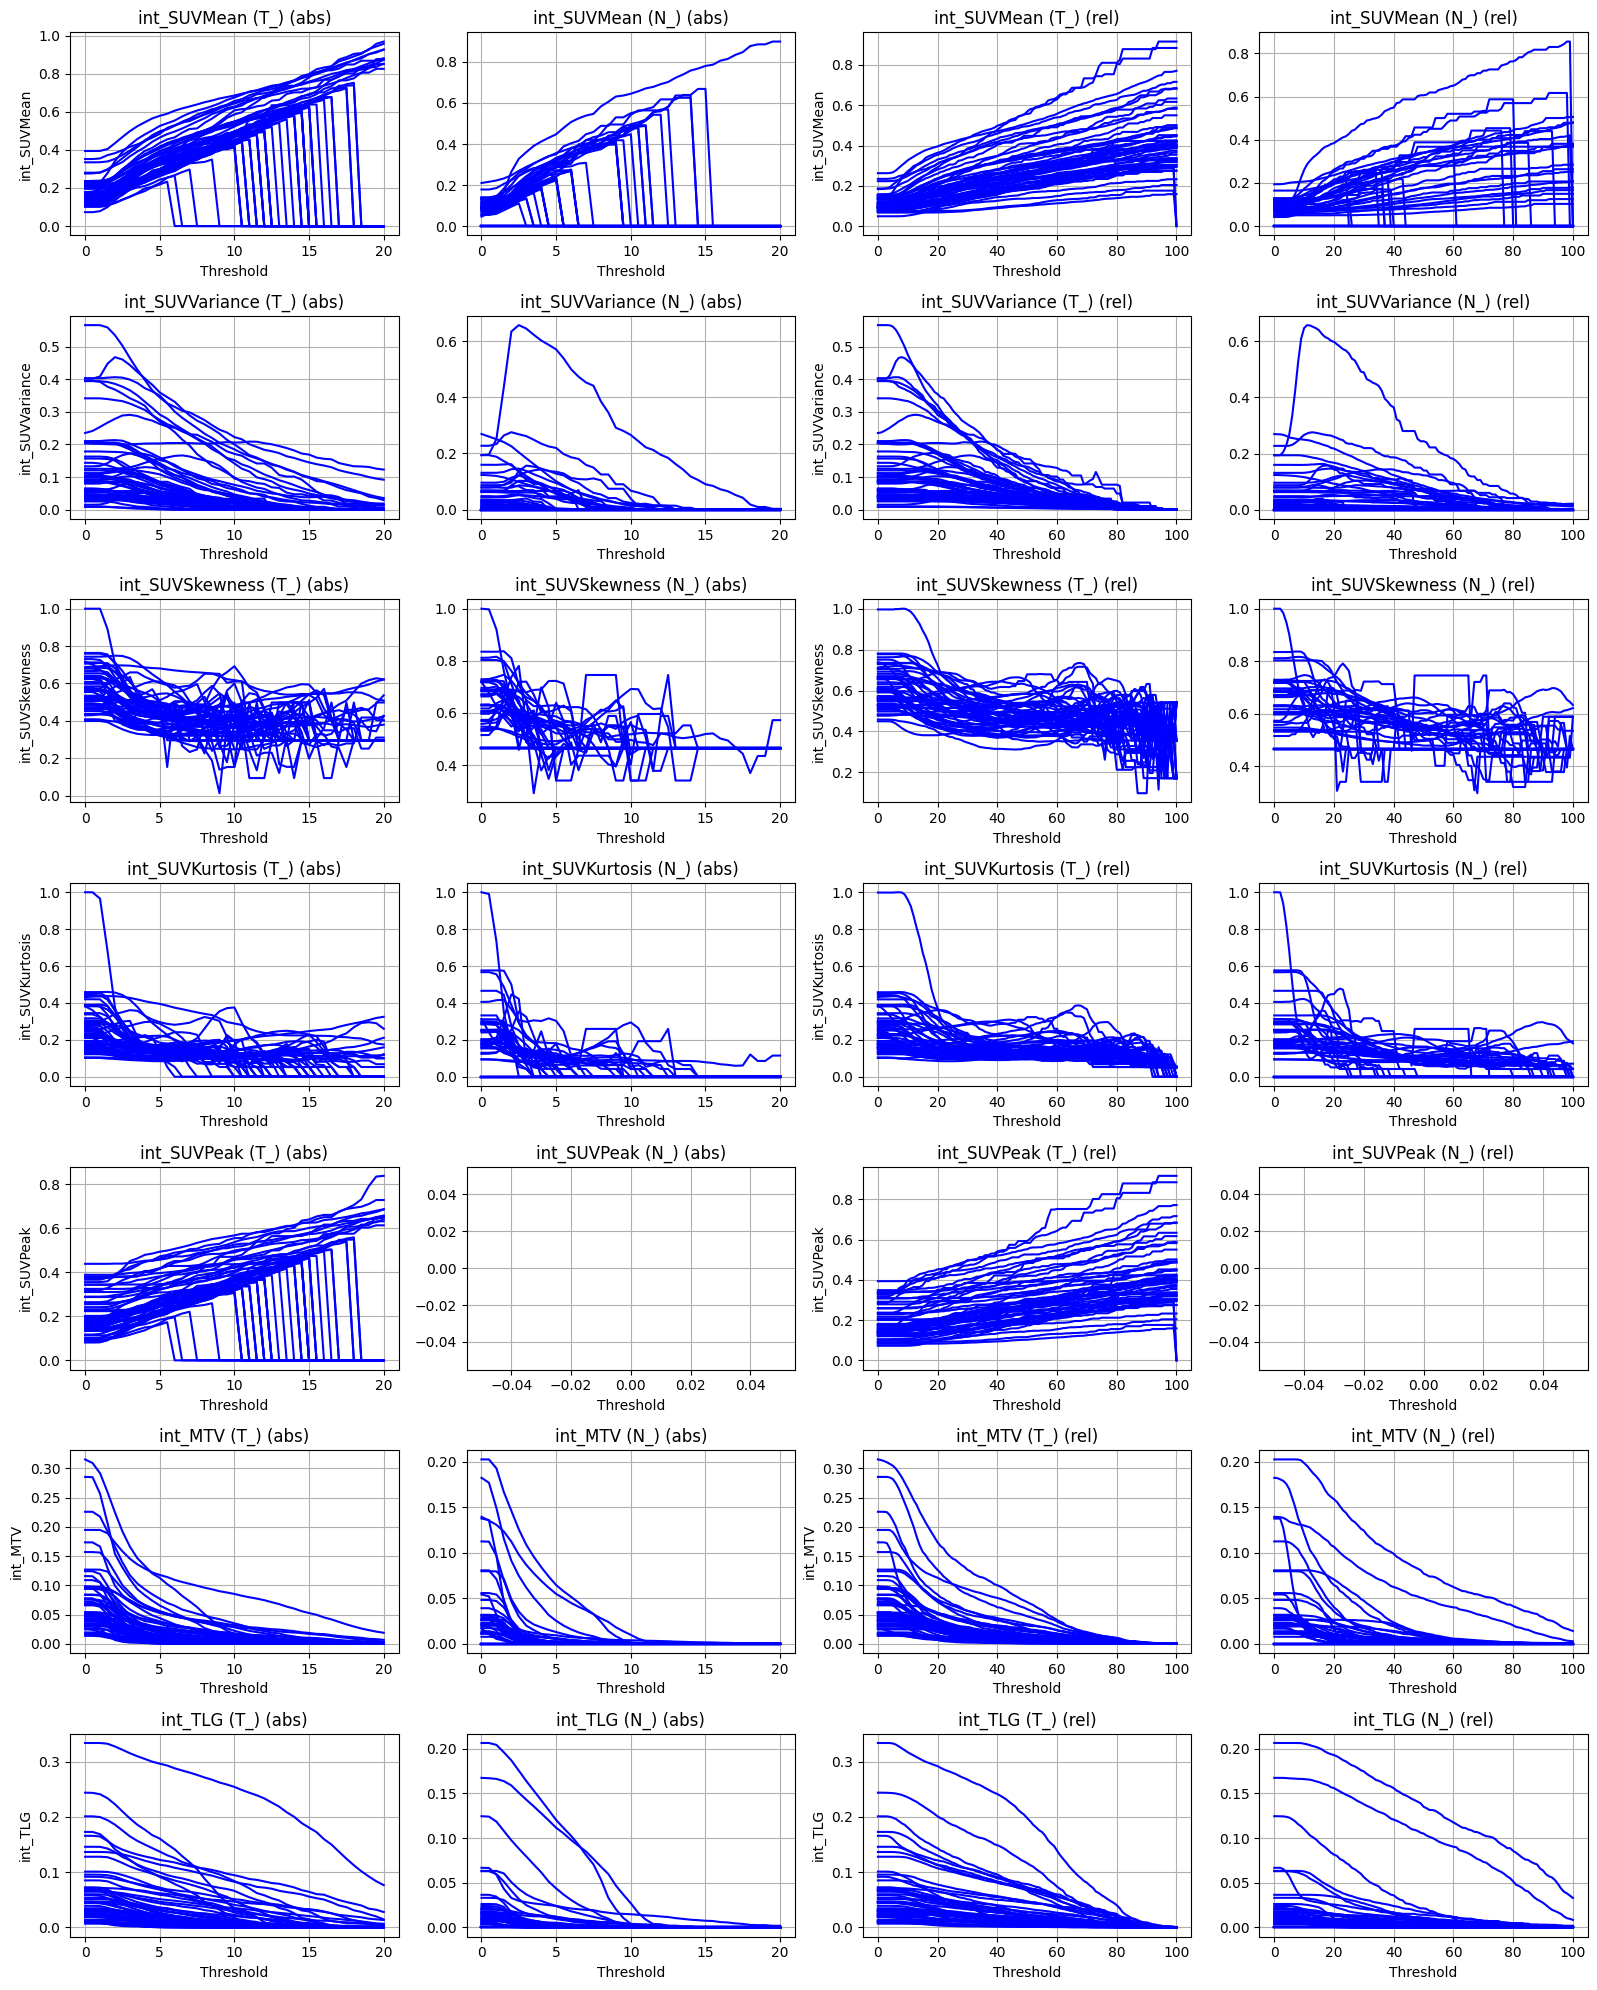

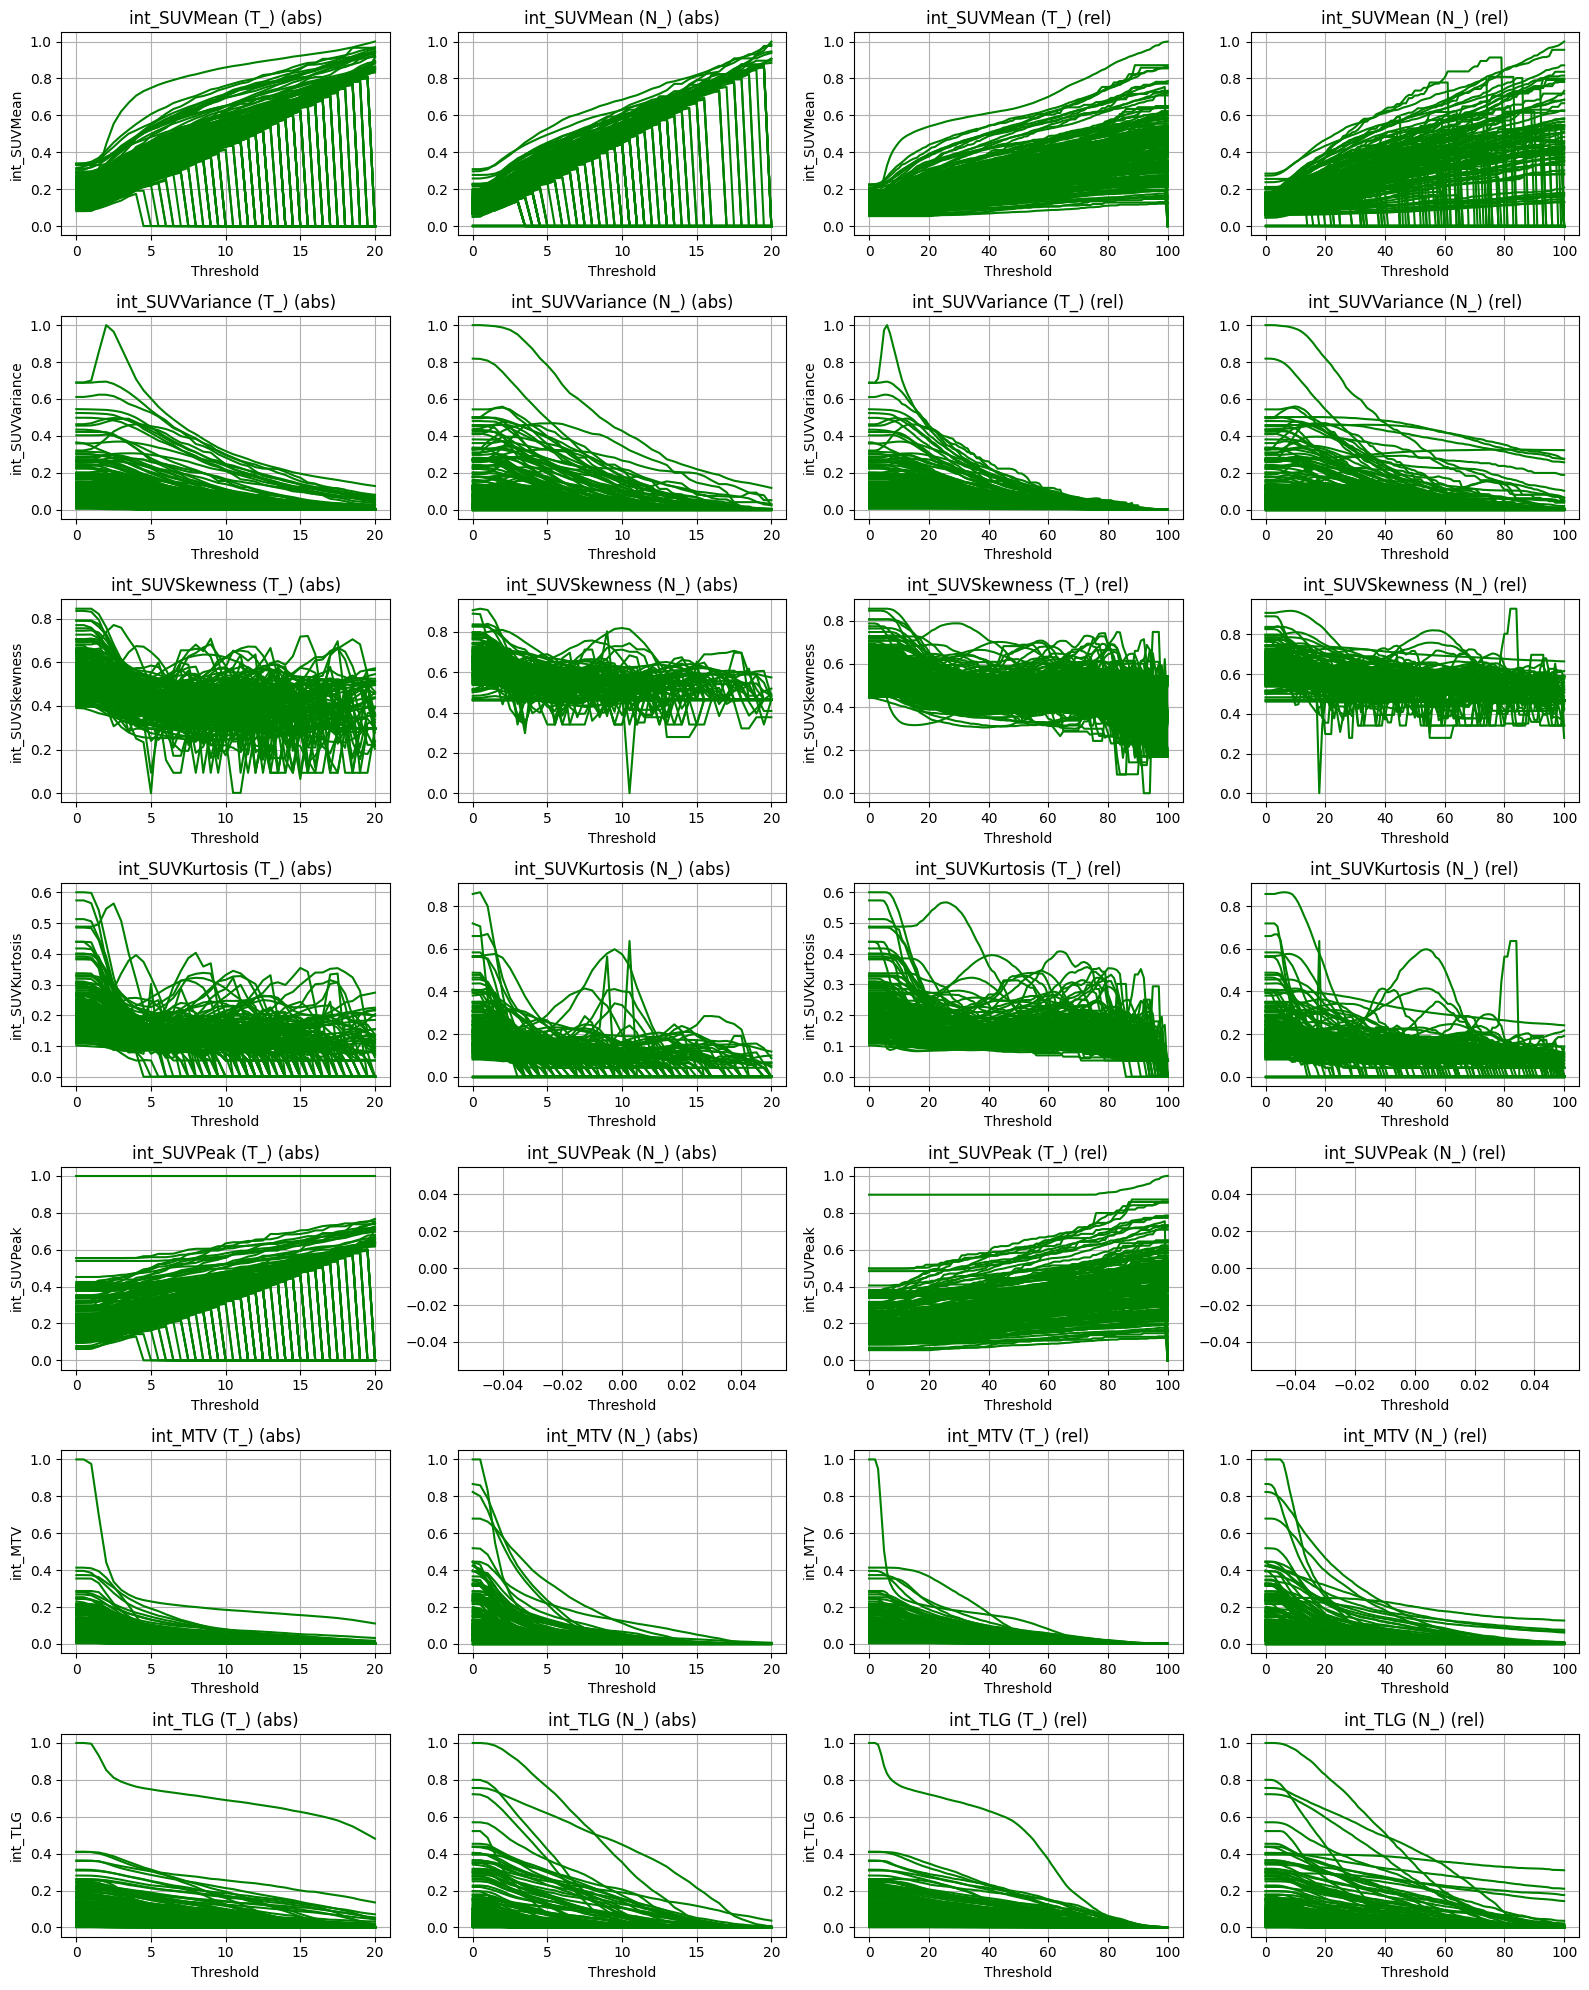

In [54]:
# Define features and comps
features = [
    'int_SUVMean', 'int_SUVVariance', 'int_SUVSkewness', 'int_SUVKurtosis',
    'int_SUVPeak', 'int_MTV', 'int_TLG'
]
comps = ['abs', 'rel']

# Define colors for each stade (different color per stade)
stade_3_color = 'blue'
stade_4_color = 'green'

# Create figures and axes for each stade
fig_stade_3, axs_stade_3 = plt.subplots(len(features), 4, figsize=(16, 20))  # 4 columns for each feature
fig_stade_4, axs_stade_4 = plt.subplots(len(features), 4, figsize=(16, 20))  # 4 columns for each feature

# Create plot matrices for each stade with different colors for each stade
create_plot_matrix(df_glob_minmax, 3, axs_stade_3, stade_3_color)
create_plot_matrix(df_glob_minmax, 4, axs_stade_4, stade_4_color)

# Adjust layout to prevent overlapping
fig_stade_3.tight_layout()
fig_stade_4.tight_layout()

# Show the plots
plt.show()

For the other continuous non-SUV intensity based features, usual min-max scaler will be used.

In [50]:
def min_max_scaler(df, columns):
    # Select only the columns to scale
    df_to_scale = df[columns]

    # Calculate the min and max values for each column
    col_min = df_to_scale.min()
    col_max = df_to_scale.max()

    # Apply Min-Max scaling to all columns at once
    scaled_df = (df_to_scale - col_min) / (col_max - col_min)

    # Assign the scaled values back to the original dataframe
    df[columns] = scaled_df

    return df

In [51]:
cont_cols = ['Age','volT','dst_MTVweightedMaxDistTN','dst_MTVweightedSumDistNBarycenterN','dst_MTVweightedSumDistTN','dst_TBarycenterN','dst_maxDistTN','dst_sumDistNBarycenterN','dst_sumDistTN','int_HUMean_3abs','int_HUMean_42rel']

df_scaled = min_max_scaler(df_glob_minmax, cont_cols)

In [52]:
df_scaled

,Age,Centre,DFS,DFSCensor,Dcd,ID,LRC,LRCCensor,LocalisationORL,OS,...,int_TLG_N_92rel,int_TLG_N_93rel,int_TLG_N_94rel,int_TLG_N_95rel,int_TLG_N_96rel,int_TLG_N_97rel,int_TLG_N_98rel,int_TLG_N_99rel,int_TLG_N_100rel,stade
0,0.605263,1,16,0,0,6,16,0,2,16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
1,0.394737,1,4,1,1,7,4,1,2,16,...,0.001604,0.000816,0.000816,0.000816,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,0.473684,1,4,1,0,8,39,0,2,39,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.736842,1,39,0,0,9,39,0,2,39,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
4,0.315789,1,35,0,0,10,35,0,2,35,...,0.013684,0.013684,0.013176,0.012663,0.012663,0.012139,0.012139,0.010530,0.009991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.947368,2,6,0,0,178,6,0,3,6,...,0.000155,0.000155,0.000155,0.000155,0.000155,0.000155,0.000155,0.000078,0.000078,3
230,0.447368,2,11,0,0,181,11,0,2,11,...,0.001209,0.000752,0.000752,0.000550,0.000550,0.000550,0.000279,0.000279,0.000279,4
231,0.473684,2,3,0,0,190,3,0,2,3,...,0.000845,0.000845,0.000713,0.000450,0.000318,0.000318,0.000279,0.000140,0.000140,4
232,0.684211,2,5,0,0,191,5,0,2,5,...,0.001883,0.001697,0.001333,0.000961,0.000775,0.000775,0.000388,0.000194,0.000000,3


### Save the clean dataset



In [55]:
df_scaled.to_excel(f'{folder_path}/df_scaled.xlsx',index=False)

In [56]:
df_scaled.to_csv(f'{folder_path}/df_scaled.csv',index=False)